# <span style="color:red"> **** Regression **** </span>

## <span style="color:blue" > ***_what is regression_?:*** </span>


In statistics, determining a relationship between a dependent variable usually denoted by y and several indipendent variables, usually denoted by X is called regression.

## <span style="color:maroon"> *** Types of Regressions *** </span>

Basically, there are two types of regressions: </span>

### <span style="color:green"> 1. _Linear Regression_:</span>

In linear regression the outcome or the dependent variable, will be continuous. Which means, there won't be any similarity between two values.

### <span style="color:green"> 2. _Logistic Regression_: </span>

In Logistic regression, the dependent values will be discrete. Which means, the values will be repeating. Logistic regression is also known as classification. If the number of classes are 2, then the model is called binray logistic regression. If there are multiple repeating values, then the model is called Multi Class classification.

So, lets see how do we write a code for _linear regression_

In python all the machine learning models are stored in the sci-kit learn package. So, let's import it.

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
import seaborn as sns

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
usedcar_df = pd.read_csv("Usedcarssales.csv")

In [8]:
usedcar_df.head()

,Unnamed: 0,yearOfRegistration,powerPS,kilometer,monthOfRegistration,namelen,name_feat,gearbox_feat,notRepairedDamage_feat,model_feat,brand_feat,fuelType_feat,vehicleType_feat,Price
0,1,2011,190,125000,5,20,2857,1,0,163,1,3,3,9.814711
1,2,2004,163,125000,8,30,73860,0,2,119,14,3,8,9.190240
2,3,2001,75,150000,6,18,63156,1,1,118,38,1,4,7.313887
3,4,2008,69,90000,7,30,139159,1,1,103,31,3,4,8.188967
4,5,1995,102,150000,10,50,22533,1,0,11,2,1,6,6.478510


In [9]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

,Unnamed: 0,yearOfRegistration,powerPS,kilometer,monthOfRegistration,namelen,name_feat,gearbox_feat,notRepairedDamage_feat,model_feat,brand_feat,fuelType_feat,vehicleType_feat,Price
Unnamed: 0,1.000000,-0.003761,0.000748,0.003575,-0.001194,-0.005766,0.001829,-0.000744,0.000527,-0.000600,0.001523,-0.001659,0.000650,-0.003951
yearOfRegistration,-0.003761,1.000000,0.186486,-0.333933,0.044390,0.158798,-0.016603,-0.094694,-0.015699,0.041173,-0.044526,0.142402,0.058958,0.508596
powerPS,0.000748,0.186486,1.000000,-0.014727,0.038635,0.106243,-0.278687,-0.447440,-0.022761,-0.132902,-0.310254,0.086305,0.112243,0.561849
kilometer,0.003575,-0.333933,-0.014727,1.000000,-0.016177,-0.105892,-0.025035,0.035524,0.005072,-0.023827,-0.026645,0.115204,0.043183,-0.415135
monthOfRegistration,-0.001194,0.044390,0.038635,-0.016177,1.000000,0.044338,-0.007326,-0.049902,-0.050227,-0.009070,-0.012156,-0.035938,-0.004369,0.091781
namelen,-0.005766,0.158798,0.106243,-0.105892,0.044338,1.000000,0.101474,-0.150795,-0.008167,0.078520,0.100056,0.043864,-0.026672,0.215490
name_feat,0.001829,-0.016603,-0.278687,-0.025035,-0.007326,0.101474,1.000000,0.113288,-0.001520,0.453217,0.850018,-0.025088,-0.114425,-0.105014
gearbox_feat,-0.000744,-0.094694,-0.447440,0.035524,-0.049902,-0.150795,0.113288,1.000000,0.038948,0.046971,0.125735,-0.057441,-0.092224,-0.303097
notRepairedDamage_feat,0.000527,-0.015699,-0.022761,0.005072,-0.050227,-0.008167,-0.001520,0.038948,1.000000,0.017825,0.016474,0.061819,0.027220,0.020543
model_feat,-0.000600,0.041173,-0.132902,-0.023827,-0.009070,0.078520,0.453217,0.046971,0.017825,1.000000,0.472098,0.049058,-0.136196,-0.034321


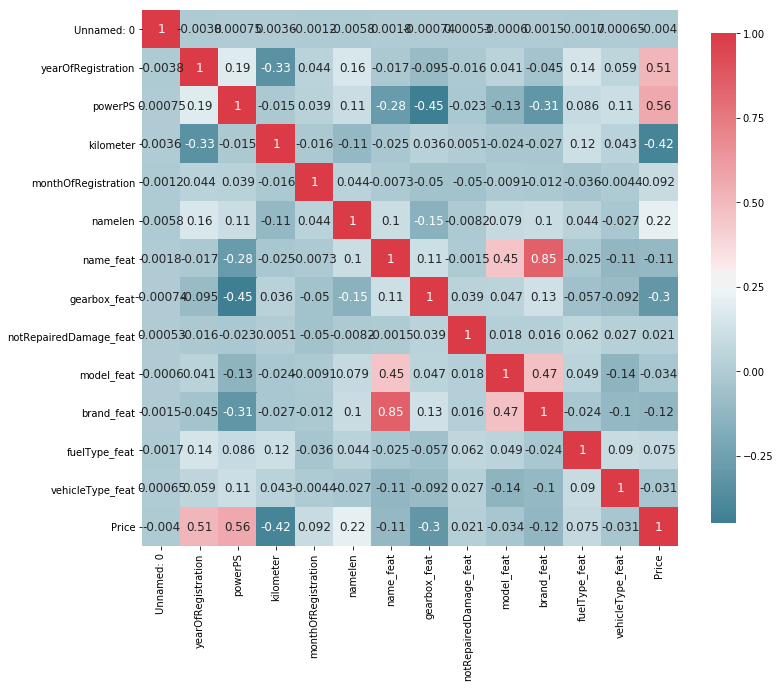

In [10]:
plot_correlation_map(usedcar_df)
usedcar_df.corr()

This is the list of the most influencing features for the price

In [11]:
usedcar_df.corr().loc[:,'Price'].abs().sort_values(ascending=False)[1:]

powerPS                   0.561849
yearOfRegistration        0.508596
kilometer                 0.415135
gearbox_feat              0.303097
namelen                   0.215490
brand_feat                0.118818
name_feat                 0.105014
monthOfRegistration       0.091781
fuelType_feat             0.074608
model_feat                0.034321
vehicleType_feat          0.030756
notRepairedDamage_feat    0.020543
Unnamed: 0                0.003951
Name: Price, dtype: float64

In [12]:
Y = usedcar_df['Price']

In [13]:
np.mean(Y)

8.102756227318086

In [14]:
np.median(Y)

8.160803920954665

In [15]:
np.max(Y)

11.918397239722838

In [16]:
np.min(Y)

4.61512051684126

In [17]:
np.var(Y)

1.4016983033483585

In [18]:
X = usedcar_df.drop(['Price'],axis=1)

In [19]:
X.head()

,Unnamed: 0,yearOfRegistration,powerPS,kilometer,monthOfRegistration,namelen,name_feat,gearbox_feat,notRepairedDamage_feat,model_feat,brand_feat,fuelType_feat,vehicleType_feat
0,1,2011,190,125000,5,20,2857,1,0,163,1,3,3
1,2,2004,163,125000,8,30,73860,0,2,119,14,3,8
2,3,2001,75,150000,6,18,63156,1,1,118,38,1,4
3,4,2008,69,90000,7,30,139159,1,1,103,31,3,4
4,5,1995,102,150000,10,50,22533,1,0,11,2,1,6


In [20]:
Y.head()

0    9.814711
1    9.190240
2    7.313887
3    8.188967
4    6.478510
Name: Price, dtype: float64

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.25, random_state = 3)

In [23]:
linreg = LinearRegression().fit(X_train,y_train)

In [24]:
print("Model Accuracy:",linreg.score(X_val,y_val))

Model Accuracy: 0.586663092549558
